# Deep Learning con redes convolucionales

<a target="_blank" href="https://colab.research.google.com/github/griverat/Meteo-AI/blob/main/notebooks/2.cnn_datos.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Si usa Google Colab, asegúrese de tener habilitada la GPU para este notebook.**

![gpu_colab](https://github.com/griverat/Meteo-AI/blob/main/images/colab_gpu.png?raw=1)

## Descripción

Este notebook contiene el material a desarrollar durante la sesión de Deep Learning. Se presentarán los conceptos básicos de deep learning y como es que se diferencia principalmente de las redes neuronales tradicionales. Se presentarán ejemplos de aplicaciones y se realizará un ejercicio práctico de clasificación de imágenes.

## Objetivos

- Conocer los conceptos básicos de deep learning.
- Entender cuando es conveniente utilizar deep learning.
- Implementar un modelo de deep learning para clasificación de imágenes.

---

## Sobre el Aprendizaje Profundo

A diferencia de las redes neuronales tradicionales, las redes neuronales profundas (deep learning) son capaces de aprender representaciones jerárquicas de los datos. Esto significa que las redes neuronales profundas pueden aprender a representar los datos en diferentes niveles de abstracción. Por ejemplo, en el caso de imágenes, una red neuronal profunda puede aprender a representar los datos en términos de bordes, formas, texturas, etc.

Debido a la complejidad de las redes neuronales profundas, el perceptrón multicapa (MLP) dejó de ser suficiente para resolver problemas complejos ya que requiere de una gran cantidad de parámetros y por ende una gran cantidad de poder computacional. Como solución a este problema, se desarrollaron las redes neuronales convolucionales (CNN) que son capaces de aprender representaciones jerárquicas de los datos de manera más eficiente.

## Redes Neuronales Convolucionales

<img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png"></img>

Arquitectura convolucional típica.
By <a href="//commons.wikimedia.org/w/index.php?title=User:Aphex34&amp;action=edit&amp;redlink=1" class="new" title="User:Aphex34 (page does not exist)">Aphex34</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=45679374">Link</a>

Una red neuronal convolucional (CNN) es una red neuronal que contiene una o más capas convolucionales. Las capas convolucionales son capaces de aprender representaciones jerárquicas de los datos de manera más eficiente que las redes neuronales tradicionales.

Los bloques básicos de una CNN son:

- **Capa convolucional**: Esta capa aplica una serie de filtros a la entrada y produce un mapa de características. Cada filtro es capaz de aprender diferentes características de los datos.
- **Capa de activación**: Esta capa aplica una función de activación a la salida de la capa convolucional. La función de activación más común es la función ReLU.
- **Capa de agrupación**: Esta capa reduce la dimensionalidad de la entrada aplicando una operación de agrupación. La operación de agrupación más común es la operación de agrupación máxima.
- **Capa completamente conectada**: Esta capa toma la salida de las capas anteriores y produce la salida final de la red.


### Importar librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import xarray as xr

plt.rcParams["font.family"] = "monospace"

### Lectura de datos

Como introducción a las redes neuronales convolucionales, utilizaremos el conjunto de datos MNIST para familiarizarnos con el proceso de entrenamiento de una red neuronal convolucional. El conjunto de datos MNIST contiene imágenes de dígitos escritos a mano y es uno de los conjuntos de datos más utilizados en el campo del aprendizaje automático.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

Previsualizamos la data descargada

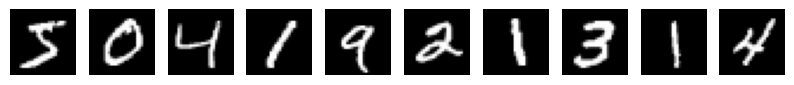

In [4]:
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].axis("off")

Como estamos tratando con imágenes, debemos normalizar los datos para que se encuentren en un rango de 0 a 1. Para ello, dividimos los valores de los píxeles por 255, que es el valor máximo de un píxel.

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0

Podemos verificar cuales son las dimensiones de nuestros datos

In [6]:
x_train.shape

(60000, 28, 28, 1)

Lo que hicimos en este caso fue asegurarnos que la imagen tenga al menos una dimensión de color ademas de la altura y el ancho. En este caso, la imagen tiene una dimensión de color, 28 píxeles de alto y 28 píxeles de ancho. A esta dimension de color se le llama canal.

Ahora que la data de entrada se encuentra lista, nos enfocamos en las etiquetas o datos de salida

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Podemos verificar que se trata de números enteros que van del 0 al 9, correspondientes a los dígitos escritos a mano. Para poder utilizar estos datos en un modelo de clasificación, necesitamos convertirlos a un formato de one-hot encoding.

**¿Qué es one-hot encoding?**

One-hot encoding es una técnica utilizada en el aprendizaje automático para representar datos categóricos como vectores binarios. En el caso de las etiquetas de los dígitos, cada etiqueta se convierte en un vector binario de 10 elementos, donde el elemento correspondiente a la etiqueta es 1 y los demás elementos son 0.

<img src="https://th.bing.com/th/id/OIP.cnmpSdK-6hAQJdTUBFxcnAHaB3?rs=1&pid=ImgDetMain"></src>

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Ahora verificamos que las etiquetas se encuentren en el formato correcto

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Crear el modelo

Para crear un modelo de red neuronal convolucional, utilizamos la clase Sequential de Keras. La clase Sequential nos permite crear un modelo de red neuronal apilando capas una encima de la otra.

El primer paso para crear un modelo de red neuronal convolucional es definir la arquitectura del modelo. En este caso, utilizaremos una arquitectura simple con dos capas convolucionales seguidas cada una por una capa de agrupación y finalmente una capa completamente conectada.

In [10]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

input_shape = (None, 28, 28, 1)
model.build(input_shape)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

### Compilar y entrenar el modelo

Una vez que hemos definido la arquitectura del modelo, debemos compilarlo y entrenarlo. Para compilar el modelo, utilizamos el método compile y especificamos la función de pérdida, el optimizador y las métricas que queremos utilizar para evaluar el modelo.

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
batch_size = 128
epochs = 15

history = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 25s 57ms/step - loss: 0.3597 - accuracy: 0.8974 - val_loss: 0.0996 - val_accuracy: 0.9730
Epoch 2/15
422/422 [==============================] - 23s 54ms/step - loss: 0.0968 - accuracy: 0.9714 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 3/15
422/422 [==============================] - 25s 58ms/step - loss: 0.0698 - accuracy: 0.9786 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 4/15
422/422 [==============================] - 27s 64ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoch 5/15
422/422 [==============================] - 27s 63ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0441 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0498 - val_accuracy: 0.9860
Epoch 7/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0395 - val_accuracy:

Podemos visualizar la función de perdida

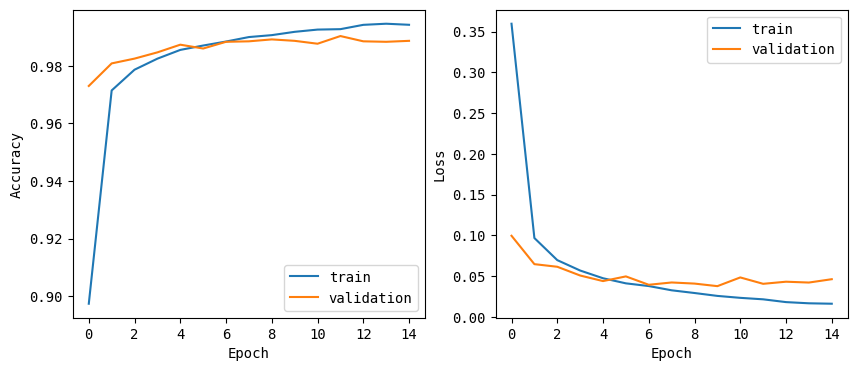

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history.history["accuracy"], label="train")
ax[0].plot(history.history["val_accuracy"], label="validation")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(history.history["loss"], label="train")
ax[1].plot(history.history["val_loss"], label="validation")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()

### Evaluar el modelo

Una vez que hemos entrenado el modelo, podemos evaluar su rendimiento en un conjunto de datos de prueba. Para evaluar el modelo, utilizamos el método evaluate y pasamos el conjunto de datos de prueba y las etiquetas de prueba.

In [15]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0353 - accuracy: 0.9881
Test loss: 0.035327211022377014
Test accuracy: 0.988099992275238


### Predicciones

Finalmente, podemos utilizar el modelo entrenado para hacer predicciones sobre nuevos datos. Para hacer predicciones, utilizamos el método predict y pasamos los datos de entrada sobre los que queremos hacer predicciones.

1/1 [==============================] - 0s 185ms/step


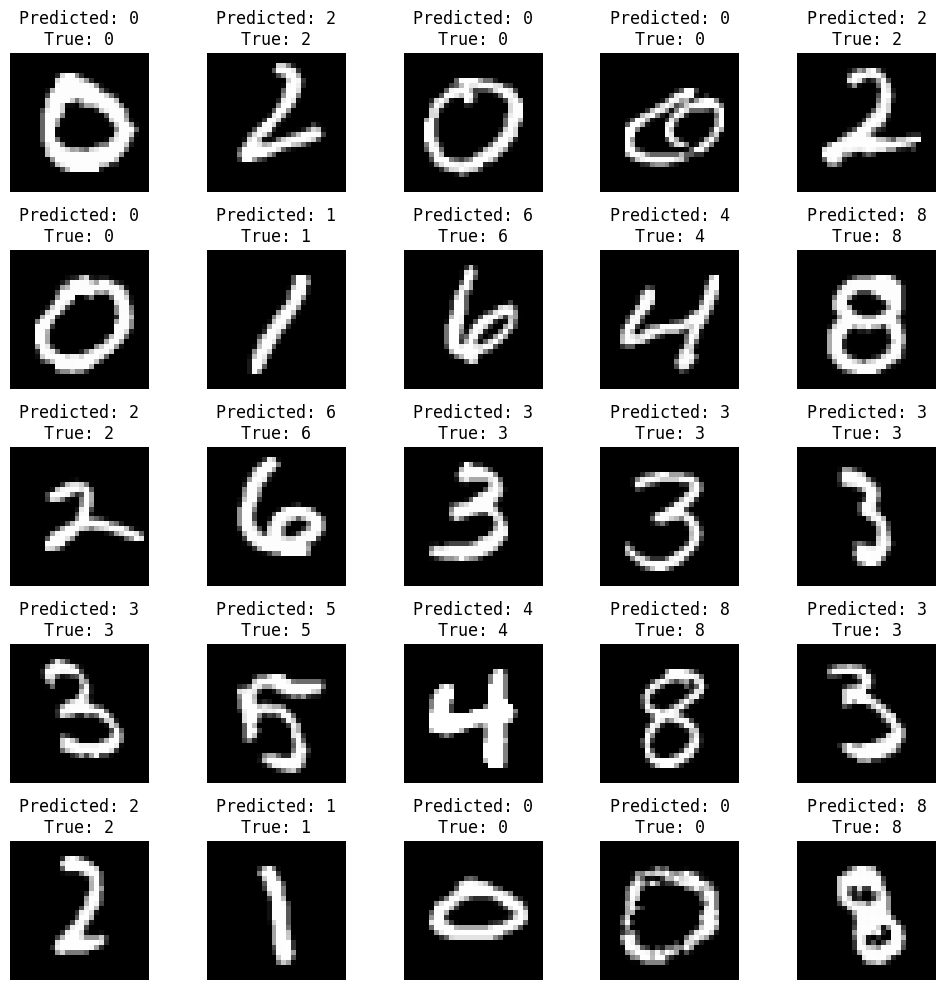

In [16]:
idxs = np.random.choice(len(x_test), 25)
images = x_test[idxs]

preds = model.predict(images).argmax(-1)

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
    ax[i // 5, i % 5].imshow(images[i].reshape(28, 28), cmap="gray")
    ax[i // 5, i % 5].axis("off")
    ax[i // 5, i % 5].set_title(
        f"Predicted: {preds[i]}\nTrue: {y_test[idxs[i]].argmax()}"
    )
fig.tight_layout()

Como podemos ver, el modelo es capaz de predecir en un 98% (aproximadamente) de los casos el dígito correcto.
Este es un ejemplo básico de cómo se puede utilizar una red neuronal convolucional para clasificar imágenes.
La base de datos de digitos escritos a mano junto con las etiquetas ya se encontraban en un formato adecuado para ser utilizadas en un modelo de clasificación, requiriendo únicamente de una normalización y un one-hot encoding. En otros casos, usualmente se requiere de un preprocesamiento más complejo de los datos antes de ser utilizados en un modelo de clasificación, como lo vamos a ver en el siguiente ejemplo.

## Pronóstico de la fase de ENOS en el Pacífico Central

En este ejemplo, utilizaremos una red neuronal convolucional para pronosticar la fase de El Niño La Oscilacion Sur (ENOS) en el Pacífico Central. El fenómeno de El Niño es un fenómeno climático que se caracteriza por el calentamiento anómalo de las aguas del Océano Pacífico ecuatorial y que tiene un impacto significativo en el clima global.

Esta demostración tomará como datos de entrada las anomalías de temperatura superficial del mar (SST) en la región del Pacífico durante los últimos 12 meses y pronosticará la fase de El Niño en los próximos 6 meses.

Vamos a descargar los datos de temperatura superficial del mar de Extended Reconstructed Sea Surface Temperature version 5 (ERSSTv5), sobre la cual haremos el cálculo del índice EN3.4 para determinar la fase de ENOS.

In [17]:
# esta descarga podria tomar algo de tiempo
!mkdir data
!wget https://downloads.psl.noaa.gov/Datasets/noaa.ersst.v5/sst.mnmean.nc -O data/sst.mnmean.nc

--2024-06-20 04:05:31--  https://downloads.psl.noaa.gov/Datasets/noaa.ersst.v5/sst.mnmean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115665692 (110M) [application/x-netcdf]
Saving to: ‘data/sst.mnmean.nc’

data/sst.mnmean.nc  100%[===================>] 110.31M  17.5MB/s    in 5.2s    

2024-06-20 04:05:36 (21.1 MB/s) - ‘data/sst.mnmean.nc’ saved [115665692/115665692]



Utilizaremos `xarray` para leer los datos de temperatura superficial del mar y calcular el índice EN3.4.

In [18]:
sst = xr.open_dataset("data/sst.mnmean.nc").sst.sortby("lat")
sst

<xarray.DataArray 'sst' (time: 2045, lat: 89, lon: 180)>
[32760900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2024-05-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

Para comenzar, los datos deben de estar en terminos de anomalías.

In [19]:
clim_period = slice("1991", "2020")
sst_clim = sst.sel(time=clim_period).groupby("time.month").mean("time")
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7999995, -1.7957594, -1.7931943, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7889608, -1.787459 , -1.7863454, ..., -1.7965791,
         -1.7920638, -1.7906437],
        [-1.7895424, -1.7893088, -1.7892059, ..., -1.7922649,
         -1.790893 , -1.7898614]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7992101, -1.7995644, -1.7999995, ..., -1.7999995,
         -1.7996503, -1.7992588],
        [-1.7990986, -1.7992803, -1.7997215, ..., -1.7995888,
         -1.7993463, -1.79909  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

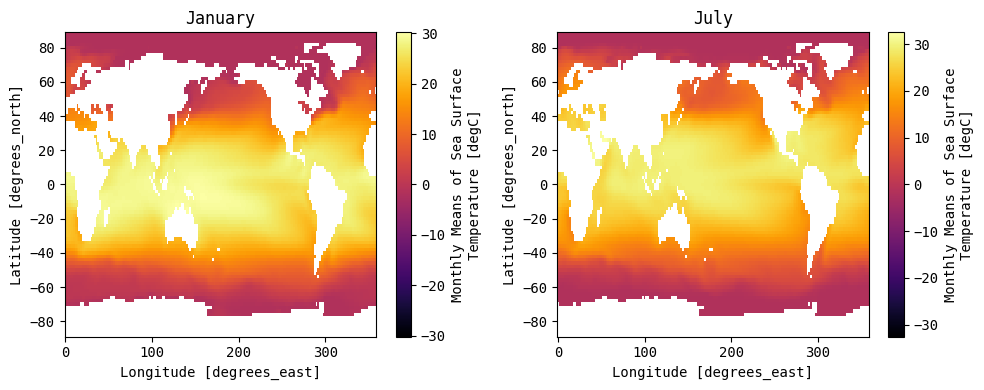

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sst_clim.sel(month=1).plot(ax=ax[0], cmap="inferno")
ax[0].set_title("January")
sst_clim.sel(month=7).plot(ax=ax[1], cmap="inferno")
ax[1].set_title("July")
fig.tight_layout()

El cálculo de las anomalías es trivial usando los métodos de `xarray`.

In [21]:
sst_anom = sst.groupby("time.month") - sst_clim
sst_anom

<xarray.DataArray 'sst' (time: 2045, lat: 89, lon: 180)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07],
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07],
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07],
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07],
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07],
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07],
        [-4.7683716e-07, -4.7683716e-07, -4.7683716e-07, ...,
         -4.7683716e-07, -4.7683716e-07, -4.7683716e-07]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2024-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

Ahora calculamos el índice EN3.4

In [22]:
en34 = sst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim=["lat", "lon"])
en34

<xarray.DataArray 'sst' (time: 2045)>
array([-0.6551815 , -0.7087165 , -0.38720417, ...,  1.1252105 ,
        0.7880739 ,  0.32183504], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2024-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

Podemos visualizar el índice EN3.4 para verificar que se haya calculado correctamente.

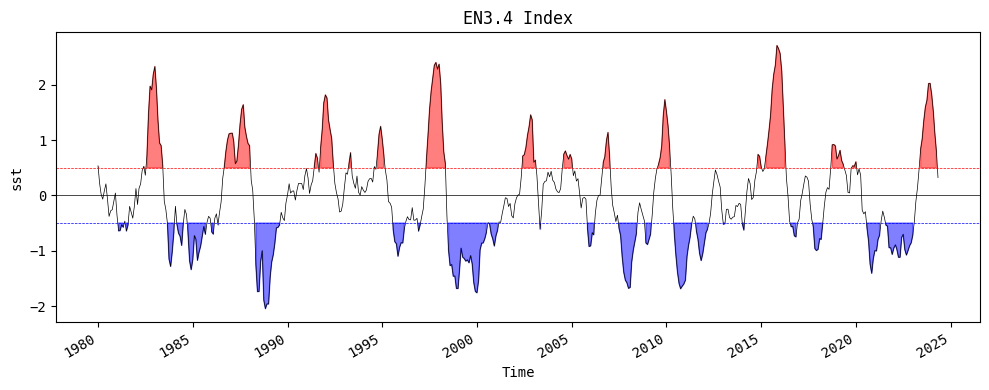

In [23]:
subset = en34.sel(time=slice("1980", None))
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
subset.plot(ax=ax, color="k", linewidth=0.5)
ax.set_title("EN3.4 Index")

ax.fill_between(subset.time, subset, 0.5, where=subset > 0.5, color="red", alpha=0.5)
ax.fill_between(subset.time, subset, -0.5, where=subset < -0.5, color="blue", alpha=0.5)

ax.axhline(0.5, color="red", linestyle="--", lw=0.5)
ax.axhline(-0.5, color="blue", linestyle="--", lw=0.5)
ax.axhline(0, color="black", linestyle="-", lw=0.5)

fig.tight_layout()

`xarray` facilita el uso y manejo de datos climaticos gracias a las funciones de agregación y selección de datos.

Ahora que tenemos las SSTA y el índice EN3.4, podemos proceder a ordenar los datos de acuerdo a la tarea que queremos realizar. primero debemos agrupar los datos en secuencias de 12 meses para las SSTA y 6 meses para el índice EN3.4.

Para lograr esto, vamos a explorar como es que el método `rolling` de `xarray` nos puede ayudar a lograr esto.
`rolling` nos permite crear una ventana movil sobre la cual podemos aplicar funciones de agregación. En nuestro caso, no estamos interesados en agregar los datos, sino en obtener las secuencias consecutivas.

Crearemos un `DataArray` con numeros del 0 al 9 para poder visualizar como funciona el método `rolling`.

In [24]:
test_data = xr.DataArray(
    np.arange(1, 13),
    dims=["time"],
    coords={"time": pd.date_range("2020-01-01", periods=12)},
)
test_data

<xarray.DataArray (time: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-01-12

In [25]:
test_data.rolling(time=3)

DataArrayRolling [time->3]

Para extraer los grupos, debemos construir una nueva dimension en donde sera almacenado

In [26]:
test_data.rolling(time=3).construct("window_dim")

<xarray.DataArray (time: 12, window_dim: 3)>
array([[nan, nan,  1.],
       [nan,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.],
       [ 9., 10., 11.],
       [10., 11., 12.]])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-01-12
Dimensions without coordinates: window_dim

`rolling` comienza desde la izquierda mientras alinea los datos hacia la derecha, llenando los valores faltantes con `NaN`. Si nos deshacemos de estos valores, obtendremos las secuencias que necesitamos.

Si nos fijamos bien en los tiempos que han sido seleccionados, podemos ver que los dos primeros tiempos tienen valores faltantes y recien a partir del tercer valor se encuentran completos.

In [27]:
test_data.rolling(time=3).construct("window_dim").isel(time=slice(2, None))

<xarray.DataArray (time: 10, window_dim: 3)>
array([[ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.],
       [ 9., 10., 11.],
       [10., 11., 12.]])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 2020-01-04 ... 2020-01-12
Dimensions without coordinates: window_dim

Cabe observar que en este pequeño ejemplo, el mes 03 esta asociado al valor 3 que se encuentra al final de la primera fila, por lo que nuestras etiquetas en el tiempo representan el tiempo final de la secuencia.

In [28]:
test_data.rolling(time=3).construct("window_dim").isel(time=slice(2, None))[0]

<xarray.DataArray (window_dim: 3)>
array([1., 2., 3.])
Coordinates:
    time     datetime64[ns] 2020-01-03
Dimensions without coordinates: window_dim

Llevando este ejemplo al set de datos de SSTA con 12 meses, obtenemos lo siguiente

In [29]:
sst_grouped = sst_anom.rolling(time=12).construct("channel").isel(time=slice(11, None))
sst_grouped

<xarray.DataArray 'sst' (time: 2034, lat: 89, lon: 180, channel: 12)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07]],

        [[-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         ...,
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -4.76837158e-07, -4.76837158e-07, -4.76837158e-07]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-12-01 1855-01-01 ... 2024-05-01
    month    (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 7 8 9 10 11 12 1 2 3 4 5
Dimensions without coordinates: channel

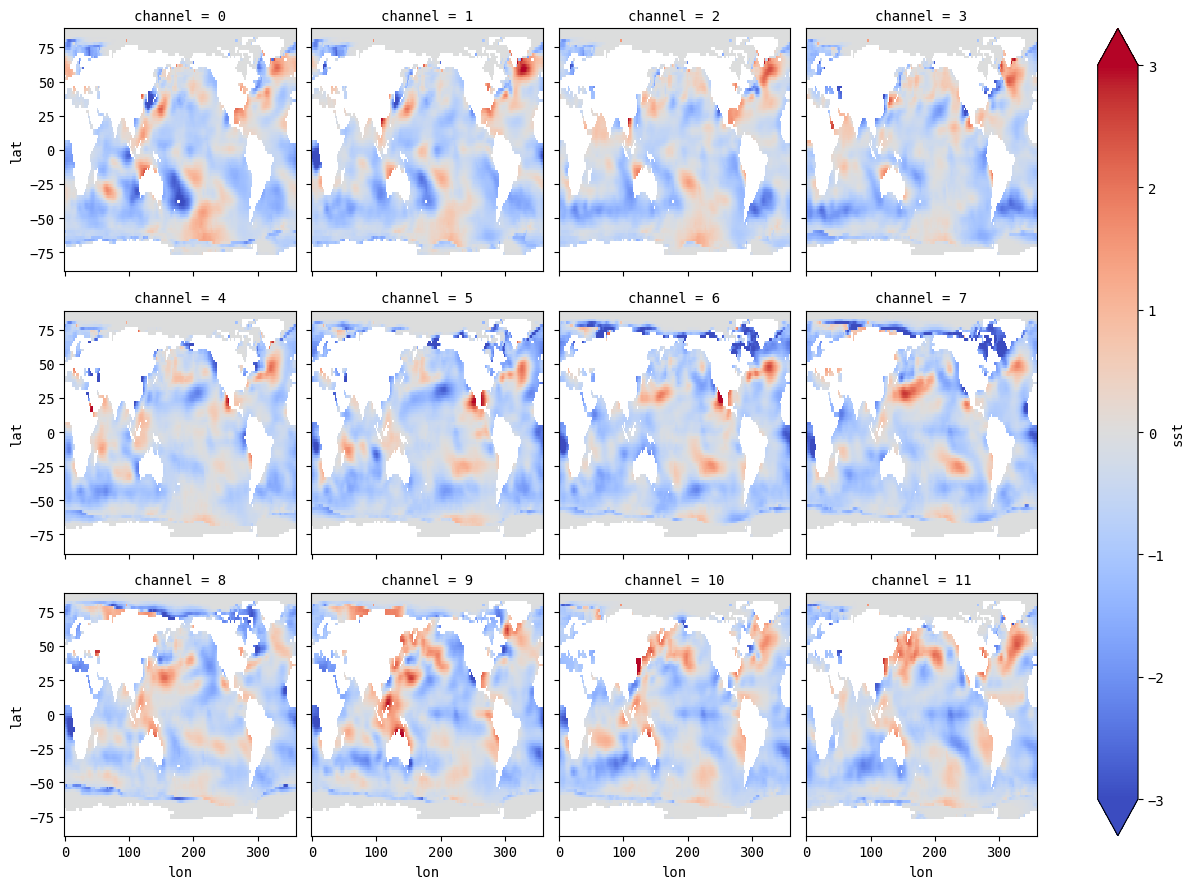

In [30]:
sst_grouped[0].plot(col="channel", col_wrap=4, cmap="coolwarm", vmin=-3, vmax=3)

Los datos de entrada ya se encuentran agrupados en secuencias de 12 meses, en donde la etiqueta de tiempo corresponde al último mes de la secuencia. Ahora debemos hacer lo mismo con el índice EN3.4. Cabe recordar que el objetivo es pronosticar la fase del ENOS en base al indice EN3.4 en los próximos 6 meses, por lo que primero debemos definir las clases. Por simplicidad, definiremos tres clases: El Niño, La Niña y Neutral, en base a los valores del índice EN3.4.

- Clase 0 - Neutral: -0.5 <= EN3.4 <= 0.5
- Clase 1 - El Niño: EN3.4 > 0.5
- Clase 2 - La Niña: EN3.4 < -0.5

In [31]:
en34

<xarray.DataArray 'sst' (time: 2045)>
array([-0.6551815 , -0.7087165 , -0.38720417, ...,  1.1252105 ,
        0.7880739 ,  0.32183504], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2024-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [32]:
enso_class = xr.where(en34 > 0.5, 1, xr.where(en34 < -0.5, 2, 0))
enso_class

<xarray.DataArray 'sst' (time: 2045)>
array([2, 2, 0, ..., 1, 1, 0])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2024-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

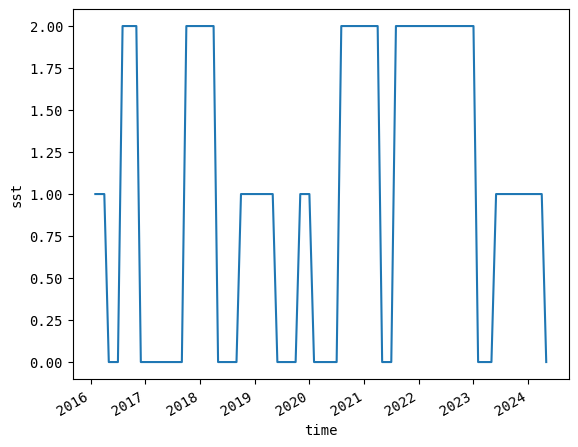

In [33]:
enso_class.tail(100).plot()

Ahora usaremos esta nueva variable de clase para agrupar los datos en secuencias de 6 meses.

In [34]:
enso_class_grouped = (
    enso_class.rolling(time=6).construct("channel").isel(time=slice(5, None))
)

# ya que rolling asigna el tiempo al ultimo valor de la secuencia, lo corregimos restando 5 meses
# de esta manera el tiempo se asigna al valor inicial de la secuencia
enso_class_grouped["time"] = pd.to_datetime(enso_class_grouped.time) - pd.DateOffset(
    months=5
)

# finalmente, desplazamos la secuencia en un paso hacia adelante
# de esta manera, el valor en el tiempo t, corresponde a los valores t+1, t+2, t+3, t+4, t+5, t+6
enso_class_grouped = enso_class_grouped.shift(time=-1).isel(time=slice(0, -1))
enso_class_grouped

<xarray.DataArray 'sst' (time: 2039, channel: 6)>
array([[2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 2., 2.],
       ...,
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0.]])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-11-01
    month    (time) int64 6 7 8 9 10 11 12 1 2 3 4 ... 6 7 8 9 10 11 12 1 2 3 4
Dimensions without coordinates: channel

Luego de haber realizado todas las operaciones de agrupación, debemos de verificar que los datos esten alineados en el tiempo.

In [35]:
min_time = max(enso_class_grouped.time.min(), sst_grouped.time.min())
max_time = min(enso_class_grouped.time.max(), sst_grouped.time.max())

sst_grouped_orig = sst_grouped.copy()
sst_grouped = sst_grouped.sel(time=slice(min_time, max_time))
enso_class_grouped = enso_class_grouped.sel(time=slice(min_time, max_time))

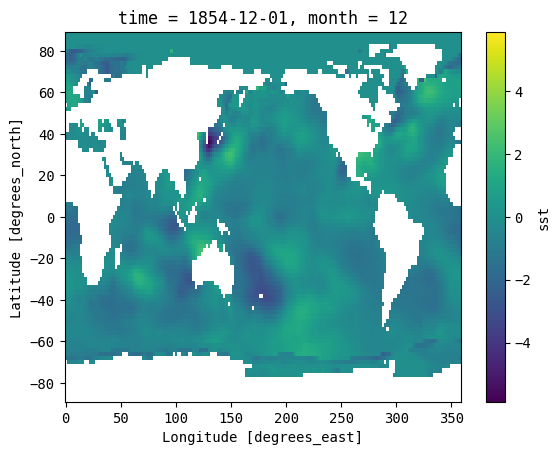

In [38]:
sst_grouped_orig.isel(time=0, channel=0).plot(cmap="viridis")

Los datos de entrada no deben de tener valores faltantes, por lo que llenaremos los valores faltantes con 0.

In [39]:
sst_grouped = sst_grouped.fillna(0)

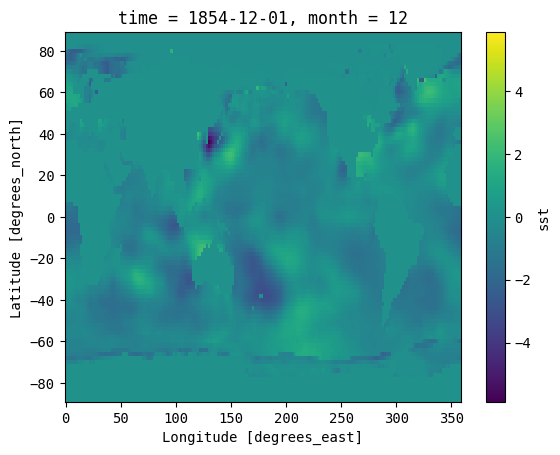

In [40]:
sst_grouped.isel(time=0, channel=0).plot(cmap="viridis")

Exploramos una muestra que sera usada en el modelo

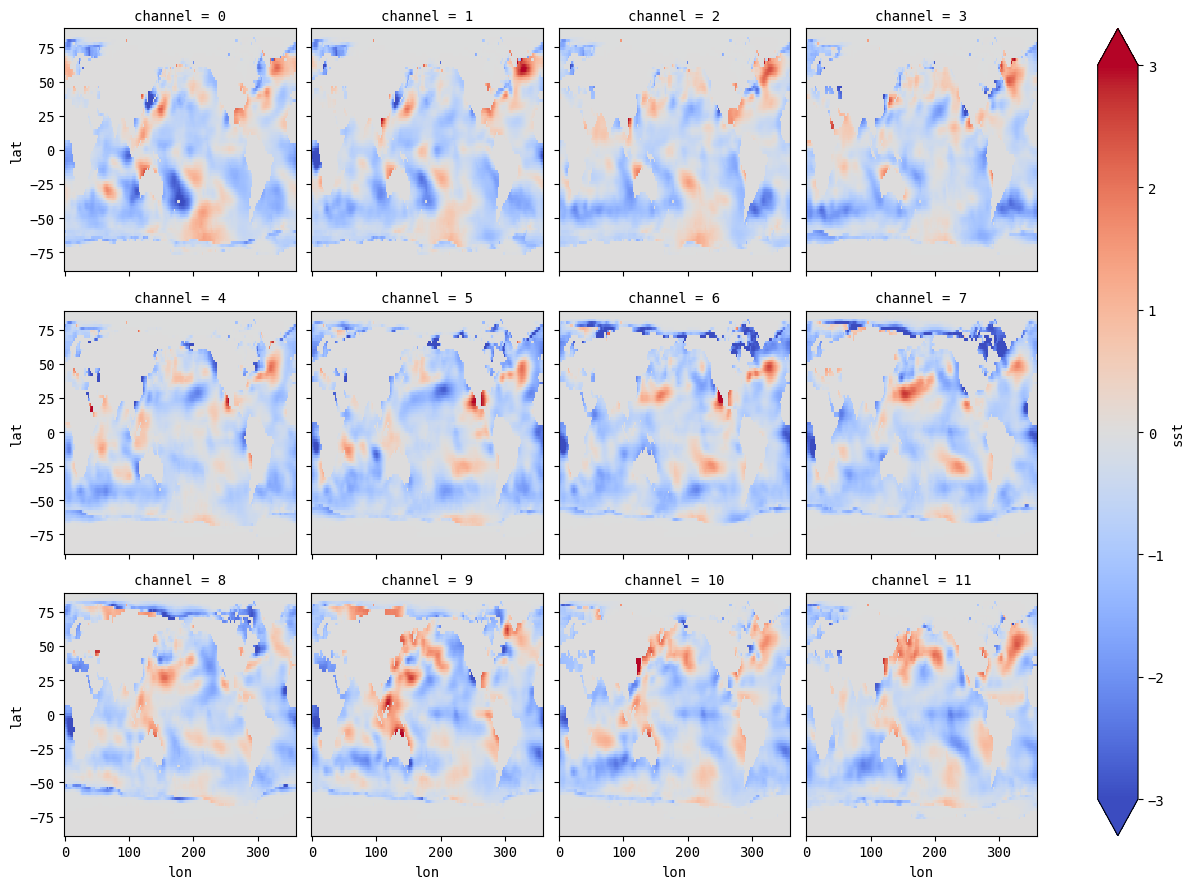

In [41]:
sst_grouped[0].plot(col="channel", col_wrap=4, cmap="coolwarm", vmin=-3, vmax=3)

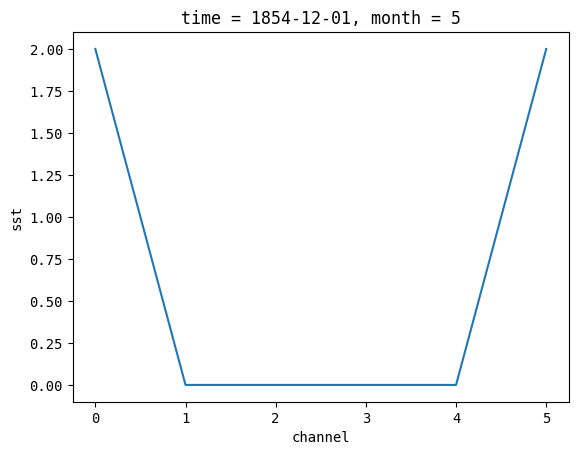

In [42]:
enso_class_grouped[0].plot()

Finalmente, cabe recordar que necesitamos tener estos datos en un formato que el modelo pueda entender, por lo que necesitamos usar one-hot encoding para las etiquetas.

In [43]:
enso_class_grouped[0]

<xarray.DataArray 'sst' (channel: 6)>
array([2., 0., 0., 0., 0., 2.])
Coordinates:
    time     datetime64[ns] 1854-12-01
    month    int64 5
Dimensions without coordinates: channel

In [44]:
one_hot_enso = tf.keras.utils.to_categorical(enso_class_grouped, 3)
one_hot_enso.shape

(2028, 6, 3)

In [45]:
one_hot_enso[0]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Separación de datos

Una vez que hemos agrupado los datos en secuencias de 12 meses para las SSTA y 6 meses para el índice EN3.4, debemos separar los datos en conjuntos de entrenamiento y prueba. Haremos una division de 80/20, donde el 80% de los datos se utilizarán para entrenar el modelo y el 20% restante se utilizará para evaluar el modelo.

In [46]:
train_size = int(0.8 * len(sst_grouped))

sst_train = sst_grouped.isel(time=slice(None, train_size)).values
enso_train = one_hot_enso[:train_size]

sst_test = sst_grouped.isel(time=slice(train_size, None)).values
enso_test = one_hot_enso[train_size:]

print(f"Train shape: {sst_train.shape}, {enso_train.shape}")
print(f"Test shape: {sst_test.shape}, {enso_test.shape}")

Train shape: (1622, 89, 180, 12), (1622, 6, 3)
Test shape: (406, 89, 180, 12), (406, 6, 3)


In [47]:
sst_grouped.isel(time=slice(None, train_size))

<xarray.DataArray 'sst' (time: 1622, lat: 89, lon: 180, channel: 12)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
          -3.42082977e-03, -4.76837158e-07, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -7.93612003e-03, -3.49640846e-04, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -9.35626030e-03, -7.41124153e-04, -4.76837158e-07]],

        [[-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -1.04575157e-02, -9.01341438e-04, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -1.06911659e-02, -7.19666481e-04, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -1.07940435e-02, -2.78472900e-04, -4.76837158e-07],
         ...,
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -7.73501396e-03, -4.11152840e-04, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -9.10699368e-03, -6.53624535e-04, -4.76837158e-07],
         [-4.76837158e-07, -4.76837158e-07, -4.76837158e-07, ...,
          -1.01385117e-02, -9.09924507e-04, -4.76837158e-07]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-12-01 1855-01-01 ... 1990-01-01
    month    (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12 1
Dimensions without coordinates: channel

Ahora que tenemos todos los datos preparados, podemos comenzar a construir el modelo de red neuronal convolucional.

### Crear el modelo

Similar al ejemplo anterior con el conjunto de datos MNIST, definimos la arquitectura del modelo con múltiples capas convolucionales seguidas por capas de agrupación y finalmente una capa completamente conectada. En este caso en particular, el modelo tendra 6 salidas, una para cada mes pronosticado.

In [48]:
def get_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(16, (3, 3), activation="relu")(model_input)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)

    x_lead1 = tf.keras.layers.Dense(3, name="lead1")(x)
    x_lead2 = tf.keras.layers.Dense(3, name="lead2")(x)
    x_lead3 = tf.keras.layers.Dense(3, name="lead3")(x)
    x_lead4 = tf.keras.layers.Dense(3, name="lead4")(x)
    x_lead5 = tf.keras.layers.Dense(3, name="lead5")(x)
    x_lead6 = tf.keras.layers.Dense(3, name="lead6")(x)

    model = tf.keras.Model(
        inputs=[model_input],
        outputs=[x_lead1, x_lead2, x_lead3, x_lead4, x_lead5, x_lead6],
    )

    return model

### Compilar y entrenar el modelo

Una vez que hemos definido la arquitectura del modelo, lo compilamos y lo entrenamos con los datos de entrenamiento. En este caso, utilizamos el optimizador Adam y la función de pérdida de entropía cruzada categórica.

In [49]:
enso_model = get_model(sst_train.shape[1:])
enso_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 89, 180, 12)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 87, 178, 16)          1744      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 43, 89, 16)           0         ['conv2d_2[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 41, 87, 32)           4640      ['max_pooling2d_2[0][0]'] 

In [50]:
enso_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

batch_size = 64
epochs = 15

history = enso_model.fit(
    sst_train,
    [enso_train[:, i] for i in range(6)],
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    shuffle=True,
)

Epoch 1/15
23/23 [==============================] - 33s 1s/step - loss: 5.8577 - lead1_loss: 0.9486 - lead2_loss: 0.9753 - lead3_loss: 0.9609 - lead4_loss: 0.9839 - lead5_loss: 1.0372 - lead6_loss: 0.9518 - lead1_accuracy: 0.5607 - lead2_accuracy: 0.5422 - lead3_accuracy: 0.5531 - lead4_accuracy: 0.5655 - lead5_accuracy: 0.5079 - lead6_accuracy: 0.5709 - val_loss: 6.6273 - val_lead1_loss: 1.0665 - val_lead2_loss: 1.1078 - val_lead3_loss: 1.0726 - val_lead4_loss: 1.1058 - val_lead5_loss: 1.1288 - val_lead6_loss: 1.1458 - val_lead1_accuracy: 0.3252 - val_lead2_accuracy: 0.3252 - val_lead3_accuracy: 0.4908 - val_lead4_accuracy: 0.3252 - val_lead5_accuracy: 0.3252 - val_lead6_accuracy: 0.3252
Epoch 2/15
23/23 [==============================] - 27s 1s/step - loss: 4.6488 - lead1_loss: 0.7043 - lead2_loss: 0.7595 - lead3_loss: 0.7697 - lead4_loss: 0.7879 - lead5_loss: 0.8011 - lead6_loss: 0.8262 - lead1_accuracy: 0.6607 - lead2_accuracy: 0.6210 - lead3_accuracy: 0.6840 - lead4_accuracy: 0.61

### Evaluar el modelo

Una vez que hemos entrenado el modelo, evaluamos su rendimiento en el conjunto de datos de prueba. En este caso, utilizamos la precisión como métrica de evaluación.

Text(0, 0.5, 'Loss')

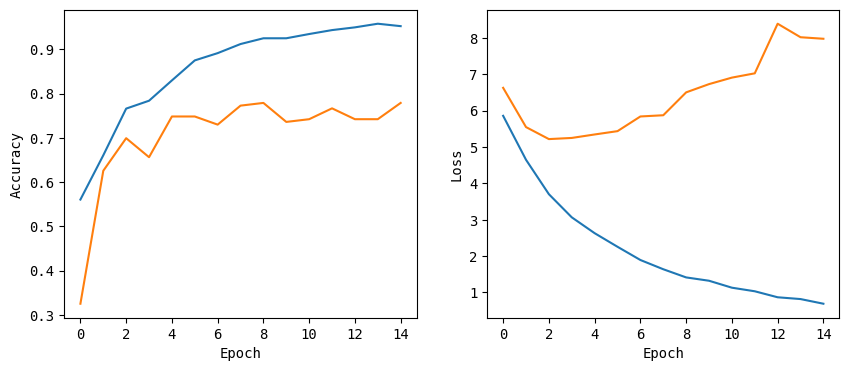

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history.history["lead1_accuracy"], label="train")
ax[0].plot(history.history["val_lead1_accuracy"], label="validation")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")

ax[1].plot(history.history["loss"], label="train")
ax[1].plot(history.history["val_loss"], label="validation")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")

Hay muchos factores que pueden afectar el rendimiento de la CNN. En este caso puede que los datos que le estemos otorgando a la red tengan demasiado detalle para el tipo de problema que estamos tratando de resolver. En este caso, la red puede estar aprendiendo demasiado sobre los datos de entrenamiento y no generalizando lo suficiente para los datos de prueba.

In [52]:
score = enso_model.evaluate(sst_test, [enso_test[:, i] for i in range(6)])
print("Test loss:", score[0])

print(f"Lead 1 accuracy: {score[7]*100:.2f}%")
print(f"Lead 2 accuracy: {score[8]*100:.2f}%")
print(f"Lead 3 accuracy: {score[9]*100:.2f}%")
print(f"Lead 4 accuracy: {score[10]*100:.2f}%")
print(f"Lead 5 accuracy: {score[11]*100:.2f}%")
print(f"Lead 6 accuracy: {score[12]*100:.2f}%")

13/13 [==============================] - 2s 155ms/step - loss: 21.6550 - lead1_loss: 1.9660 - lead2_loss: 2.8308 - lead3_loss: 3.4194 - lead4_loss: 3.9030 - lead5_loss: 4.2842 - lead6_loss: 5.2516 - lead1_accuracy: 0.6059 - lead2_accuracy: 0.5616 - lead3_accuracy: 0.4951 - lead4_accuracy: 0.4532 - lead5_accuracy: 0.4113 - lead6_accuracy: 0.3719
Test loss: 21.65502166748047
Lead 1 accuracy: 60.59%
Lead 2 accuracy: 56.16%
Lead 3 accuracy: 49.51%
Lead 4 accuracy: 45.32%
Lead 5 accuracy: 41.13%
Lead 6 accuracy: 37.19%


### Prediccion con los valores más recientes

La variable `sst_grouped_orig` contiene los datos mas recientes de SST, por lo que podemos usar estos datos para hacer predicciones sobre la fase de ENOS en los próximos 6 meses.

In [54]:
latest_data = sst_grouped_orig.isel(time=-1).fillna(0)
latest_data = latest_data.values[None, ...]
latest_data.shape

(1, 89, 180, 12)

Tenemos 3 clases: Neutral (0), El Niño (1) y La Niña (2)

CNN -> Lead1 = [15, -4, 6] <- ¿en que posición se encuentra el valor máximo?
                ^^
                0   1   2

In [56]:
# implemente la prediccion de los 6 meses siguientes
current_pred = enso_model.predict(latest_data)
current_pred

1/1 [==============================] - 0s 151ms/step


[array([[ 2.9161398, -1.7072849, -3.224248 ]], dtype=float32),
 array([[ 1.1783161, -6.1865535,  7.660199 ]], dtype=float32),
 array([[ -3.2542317, -15.133776 ,   3.7201777]], dtype=float32),
 array([[-1.3069338, -9.315722 , 16.839367 ]], dtype=float32),
 array([[  2.2539814, -17.581871 ,  16.12537  ]], dtype=float32),
 array([[ -8.033539 , -16.83549  ,   3.0295238]], dtype=float32)]

In [57]:
np.argmax(current_pred, axis=-1)

array([[0],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [58]:
current_pred[0]

array([[ 2.9161398, -1.7072849, -3.224248 ]], dtype=float32)

Al usar la funcionción de activación softmax, convertimos el vector de datos en crudo a probabilidades de que nuestro resultado pertenezca a una clase. Para el primer dato pronosticado, el modelo tiene un 98% de certeza de que pertenece a la primera clase (clase 0 - Neutral)

In [59]:
(tf.keras.layers.Activation("softmax")(current_pred[0])).numpy()

array([[0.9881684 , 0.00970294, 0.0021286 ]], dtype=float32)